In [1]:
import numpy as np
import math
import pandas as pd
import random

In [2]:
%cd ..
from MIC import *
from MIC.utils import *
from MIC.visualize import *
from MIC.calc import *
from MIC.dataloader import *
from MIC.statistics import *
%cd sample

/Users/junnai_ai/Desktop/統計/最小情報コピュラ
/Users/junnai_ai/Desktop/統計/最小情報コピュラ/sample


In [3]:
epsilon = 1e-7

In [4]:
def greedy_mic_plus(size,const,inv,k):
    '''
    inv: (pseudo) log odds ratio
    '''
    def solve_movement_MICK(theta,x1,x2,x3,x4,k):
        a = 1-math.exp(theta*(x1+x2+x3+x4))
        b = x1+x4+(x2+x3)*math.exp(theta*((x1+x2+x3+x4)**k))
        c = x1*x4 - x2*x3*math.exp(theta*((x1+x2+x3+x4)**k))
        solution = solv_quadratic_equation(a,b,c)
        return solution

    def solve_movement_MICS(theta,x1,x2,x3,x4):
        a = 1-math.exp(theta)
        b = x1+x4+(x2+x3)*math.exp(theta)
        c = x1*x4 - x2*x3*math.exp(theta)
        solution = solv_quadratic_equation(a,b,c)
        return solution

    def greedy_MICK_plus(size,invariance):
        n = size #n=30で45s.
        opt = create_uniform((n,n))

        while True: 
            max_delta = 0
            for i in range(n-1):
                for j in range(n-1):
                    delta = solve_movement_MICK(invariance,opt[i][j],opt[i+1][j],opt[i][j+1],opt[i+1][j+1],k)
                    opt[i][j] += delta
                    opt[i+1][j+1] += delta
                    opt[i+1][j] -= delta
                    opt[i][j+1] -= delta
                    if delta > max_delta:
                        max_delta = delta
            if abs(max_delta) < epsilon:
                break
        return opt
    
    def greedy_MICS_plus(size,invariance):
        n = size #n=30で45s.
        opt = create_uniform((n,n))

        while True: 
            max_delta = 0
            for i in range(n-1):
                for j in range(n-1):
                    delta = solve_movement_MICS(invariance,opt[i][j],opt[i+1][j],opt[i][j+1],opt[i+1][j+1])
                    opt[i][j] += delta
                    opt[i+1][j+1] += delta
                    opt[i+1][j] -= delta
                    opt[i][j+1] -= delta
                    if delta > max_delta:
                        max_delta = delta
            if abs(max_delta) < epsilon:
                break
        return opt
    
    if const=="rho":
        return greedy_MICS_plus(size,inv)
    else:
        return greedy_MICK_plus(size,inv)

In [5]:
def greedy_mic(size,const,inv):
    '''
    inv: (pseudo) log odds ratio
    '''
    def solve_movement_MICK(theta,x1,x2,x3,x4):
        a = 1-math.exp(theta*(x1+x2+x3+x4))
        b = x1+x4+(x2+x3)*math.exp(theta*(x1+x2+x3+x4))
        c = x1*x4 - x2*x3*math.exp(theta*(x1+x2+x3+x4))
        solution = solv_quadratic_equation(a,b,c)
        return solution

    def solve_movement_MICS(theta,x1,x2,x3,x4):
        a = 1-math.exp(theta)
        b = x1+x4+(x2+x3)*math.exp(theta)
        c = x1*x4 - x2*x3*math.exp(theta)
        solution = solv_quadratic_equation(a,b,c)
        return solution

    def greedy_MICK(size,invariance):
        n = size #n=30で45s.
        opt = create_uniform((n,n))

        while True: 
            max_delta = 0
            for i in range(n-1):
                for j in range(n-1):
                    delta = solve_movement_MICK(invariance,opt[i][j],opt[i+1][j],opt[i][j+1],opt[i+1][j+1])
                    opt[i][j] += delta
                    opt[i+1][j+1] += delta
                    opt[i+1][j] -= delta
                    opt[i][j+1] -= delta
                    if delta > max_delta:
                        max_delta = delta
            if abs(max_delta) < epsilon:
                break
        return opt
    
    def greedy_MICS(size,invariance):
        n = size #n=30で45s.
        opt = create_uniform((n,n))

        while True: 
            max_delta = 0
            for i in range(n-1):
                for j in range(n-1):
                    delta = solve_movement_MICS(invariance,opt[i][j],opt[i+1][j],opt[i][j+1],opt[i+1][j+1])
                    opt[i][j] += delta
                    opt[i+1][j+1] += delta
                    opt[i+1][j] -= delta
                    opt[i][j+1] -= delta
                    if delta > max_delta:
                        max_delta = delta
            if abs(max_delta) < epsilon:
                break
        return opt
    
    if const=="rho":
        return greedy_MICS(size,inv)
    else:
        return greedy_MICK(size,inv)

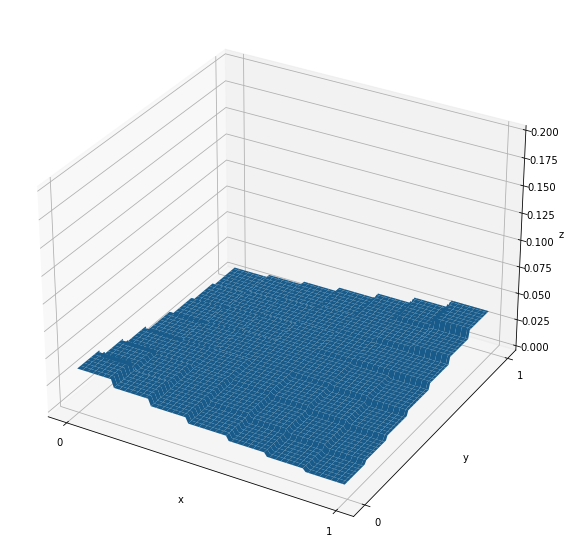

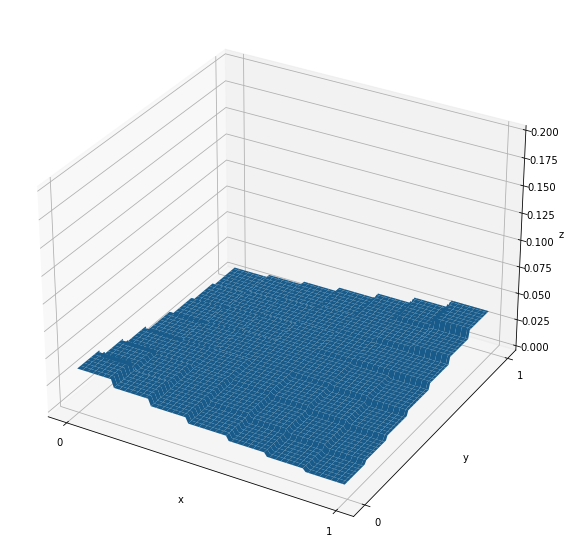

In [6]:
mat = greedy_mic_plus(7,"tau",1,k = 1)
three_dim_plot_flatten(mat)

# MICKとMICSの尤度を比較する

## データロード

In [7]:
from datetime import datetime, date, timedelta
start = date(2013,1,1)
end = date(2019,12,31) #7年分

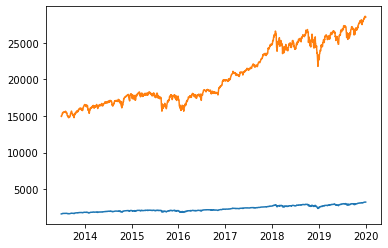

In [8]:
df_sp = get_data_from_fred(start,end,"SP500").dropna()
df_nikkei = get_data_from_fred(start,end,"NIKKEI225").dropna()
df_dau = get_data_from_fred(start,end,"DJIA").dropna()
plt.plot(df_sp)
plt.plot(df_dau)

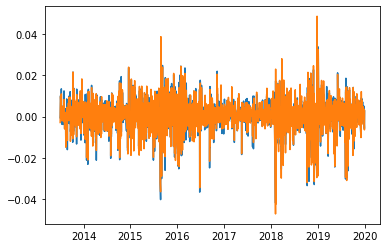

In [9]:
df_sp_adj = log_return(df_sp,0)
df_nikkei_adj = log_return(df_nikkei,0)
df_dau_adj = log_return(df_dau,0)
plt.plot(df_sp_adj)
plt.plot(df_dau_adj)

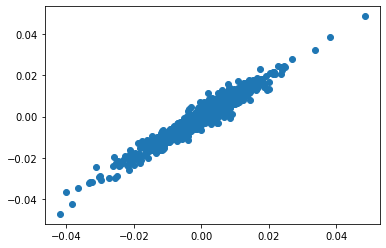

In [10]:
plt.scatter(df_sp_adj,df_dau_adj)

In [11]:
df_merged = pd.DataFrame()
df_merged["sp"] = df_sp_adj
df_merged["dau"] = df_dau_adj
calc_bivar_stats(df_merged)

u=0.05,Threshold: -0.013995038527950136,-0.014198120589032467
λL: 0.8395061728395061
u=0.01,Threshold: -0.02528236287170431,-0.0241596345956294
λL: 0.8125
u=0.05,Threshold: 0.012801813443832692,0.013004044273840701
λU: 0.7777777777777778
u=0.01,Threshold: 0.0203179415517183,0.020545219319966432
λU: 0.9375


(KendalltauResult(correlation=0.8016642949878665, pvalue=0.0),
 SpearmanrResult(correlation=0.9390767888922271, pvalue=0.0),
 0.8395061728395061,
 0.8125,
 0.7777777777777778,
 0.9375)

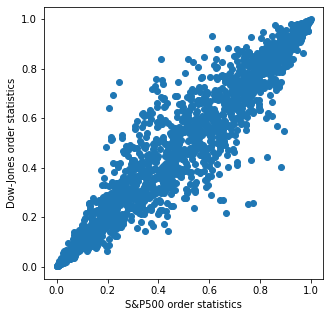

In [12]:
df_os, df_preprocessed = preprocessing(df_merged)
#散布図
plt.figure(figsize=(5,5))
plt.xlabel("S&P500 order statistics")
plt.ylabel("Dow-Jones order statistics")
plt.scatter(df_preprocessed["sp-os"],df_preprocessed["dau-os"])

# フィッティング（n=30だと数分かかる）

In [36]:
n = 30
mick = greedy_mic_plus(n,"tau",inv=9.5,k=1)
mics = greedy_mic_plus(n,"rho",inv=0.1,k=0) #kは使わない
#mics2 = greedy_mic_plus(n,"tau",inv=0.1,k=0) #なぜエラー？

## 尤度比較

In [55]:
for alpha in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    #alpha = 0.5
    mic_ks = alpha*mick+(1-alpha)*mics

    log_likelihood = 0
    for data in list(df_os.values):
        i_ = int(data[0]/(1/n))
        j_ = int(data[1]/(1/n))
        l = mic_ks[i_][j_]/((1/n)*(1/n))
        log_likelihood += math.log(l)
    print(f"MICK+MICSの対数尤度(alpha={alpha}):",log_likelihood)

MICK+MICSの対数尤度(alpha=0): 1585.6017109503646
MICK+MICSの対数尤度(alpha=0.1): 1606.0281950478543
MICK+MICSの対数尤度(alpha=0.2): 1620.6829045283753
MICK+MICSの対数尤度(alpha=0.3): 1633.3646787969724
MICK+MICSの対数尤度(alpha=0.4): 1644.7128794282885
MICK+MICSの対数尤度(alpha=0.5): 1654.9766553763438
MICK+MICSの対数尤度(alpha=0.6): 1664.2795688749732
MICK+MICSの対数尤度(alpha=0.7): 1672.689712102518
MICK+MICSの対数尤度(alpha=0.8): 1680.245368694661
MICK+MICSの対数尤度(alpha=0.9): 1686.9662032794647
MICK+MICSの対数尤度(alpha=1): 1692.8586358473847


In [59]:
mick_square = greedy_mic_plus(n,"tau",inv=9.5,k=1.2)

log_likelihood = 0
for data in list(df_os.values):
    i_ = int(data[0]/(1/n))
    j_ = int(data[1]/(1/n))
    l = mick_square[i_][j_]/((1/n)*(1/n))
    log_likelihood += math.log(l)
print(f"MICの対数尤度:",log_likelihood)

MICの対数尤度: 1267.4957676754584


In [61]:
mick_square = greedy_mic_plus(n,"tau",inv=9.5,k=0.9)

log_likelihood = 0
for data in list(df_os.values):
    i_ = int(data[0]/(1/n))
    j_ = int(data[1]/(1/n))
    l = mick_square[i_][j_]/((1/n)*(1/n))
    log_likelihood += math.log(l)
print(f"MICの対数尤度:",log_likelihood)

MICの対数尤度: 1455.4225272477302


In [64]:
mic = greedy_mic_plus(n,"tau",inv=9,k=1)
log_likelihood = 0
for data in list(df_os.values):
    i_ = int(data[0]/(1/n))
    j_ = int(data[1]/(1/n))
    l = mic[i_][j_]/((1/n)*(1/n))
    log_likelihood += math.log(l)
print(f"MICの対数尤度:",log_likelihood)

MICの対数尤度: 1699.0979487950508


In [65]:
mic = greedy_mic_plus(n,"tau",inv=10,k=1)
log_likelihood = 0
for data in list(df_os.values):
    i_ = int(data[0]/(1/n))
    j_ = int(data[1]/(1/n))
    l = mic[i_][j_]/((1/n)*(1/n))
    log_likelihood += math.log(l)
print(f"MICの対数尤度:",log_likelihood)

MICの対数尤度: 1681.6710754669696
